# Actividad 1: Diagnóstico de Cáncer con Machine Learning

En esta primera actividad vamos a utilizar el lenguaje de programación python para detectar cáncer a través de datos reales provenientes de la secuenciación de biopsias en pacientes.

## Breve introducción a python

Un código, en cualquier lenguaje de programación, depende de muchos tipos de algoritmos. Es decir, un lenguaje de programación es como un puzzle: nos proporciona unas piezas en forma de algoritmos y nos da total libertad para juntarlas como queramos y llegar a un algoritmo nuevo (o una figura, si seguimos con la analogía de los puzzles). En principio, estas piezas están desordenadas. Por suerte, es muy fácil juntar estas piezas, crear nuevas figuras y, lo más importante, compartirlas con cualquier otra persona.

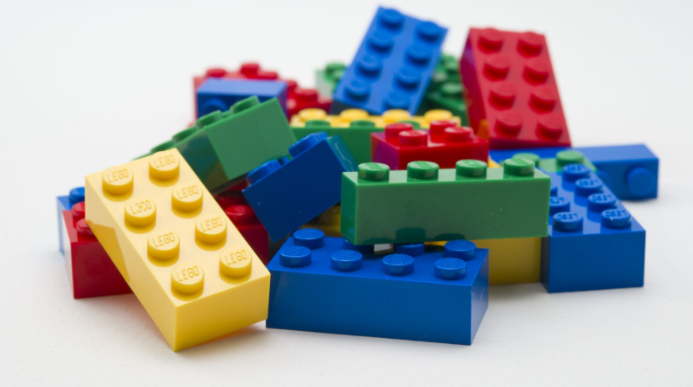

Python es un lenguaje de programación de código abierto, es decir, podemos acceder fácilmente a sus algoritmos y editarlos. Esto permite que cualquier persona desarrolle nuevos algoritmos utilizando otros anteriores. De esta forma, se van construyendo nuevas "figuras" que, a su vez, pueden utilizarse para crear otras "figuras" más grandes y complejas. Por ejemplo, con las piezas de la imagen anterior, podemos construir un coche:

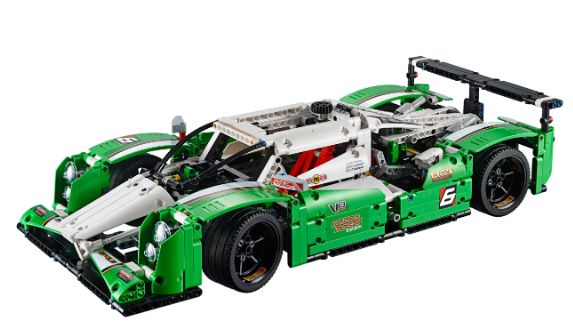

Por otra parte, un código es mucho más fácil de distribuir que unas piezas o una figura construida. Podemos acceder a algoritmos complejos que se han ido construyendo sobre otros algoritmos previos. Estas colecciones de algoritmos se conocen como *paquetes*.

En python podemos importar estos paquetes muy fácilmente. En esta primera celda, vamos a importar pandas, que es un paquete que nos permite trabajar con datos organizados en tablas. Puedes pensar en pandas como un Excel pero más *nerdy* 🤓.

Ejecuta la siguiente celda dándole al botón de *play* que aparecerá en la parte izquierda.

In [3]:
import pandas as pd

Como ves no ha pasado nada interesante. A la izquierda de la celda, donde estaba el botón de *play*, verás que ahora tenemos un [1] y un pequeño *tick* verde a la izquierda de la celda. ¡Esto quiere decir que nuestro código se ha ejecutado sin ningún error!

Lo que hace este código es importar el paquete pandas y darle el nombre "pd" (sabiendo inglés, el código anterior es bastante intuitivo 😃). Ahora podemos trabajar con pandas, al que hemos dado el nombre "pd".

Como mencionamos antes, todos estos paquetes pueden tener muchas funciones dentro. Podemos acceder a ellas escribiendo un punto "." después del nombre del paquete.

En pandas hay muchísimas funciones, así que nadie se las sabe de memoria. Tradicionalmente, la gente tenía que referirse a enormes manuales en los que se explican las distintas funciones y sus usos. No te preocupes, hoy en día todo es mucho más sencillo: un buscador de internet o un chat con inteligencia artificial te ayudarán siempre que lo necesites.

Para leer los datos que necesitamos, vamos a utilizar la función read_csv de pandas. Si no sabes cómo utilizar una función siempre le puedes pedir ayuda a python escribiendo un signo de interrogación "?" despues del nombre de la función:

In [2]:
# Esta línea está comentada.
# Esta también :)
# Cualquier línea que comienza con "#" es ignorada en la ejecución.
# Parece una tontería, pero no lo es: es fundamental explicar qué es lo que hace tu código.
# No solo para que lo entienda otra gente, sino también uno mismo.

# Ahora vamos a ver la ayuda de la función pd.read_csv
pd.read_csv?

## Importar datos

In [4]:
# Importar datos de secuenciación de los pacientes con cáncer de mama.
datos_secuencia = pd.read_csv('data/breast_cancer_data.csv',sep=',',index_col=0)

In [5]:
# Importar datos sobre el estado del paciente
datos_estado = pd.read_csv('data/breast_cancer_classification.csv',sep=',',index_col=0)

In [6]:
datos_secuencia.shape, datos_estado.shape

((214, 53), (214, 1))

In [ ]:
datos_secuencia.head()

In [ ]:
datos_estado.head()

## Diagnóstico de cáncer de mama

En este apartado vamos a usar un algoritmo de IA para diagnosticar los casos de cáncer de mama. Para ello, vamos a utilizar los datos de secuenciación que acabamos de importar.

### Entrenar un modelo de clasificación

In [7]:
# Vamos a cargar la función que nos permite dividir los datos en entrenamiento y test
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(datos_secuencia, datos_estado, test_size=0.2, random_state=42, stratify=datos_estado)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(171, 53) (43, 53) (171, 1) (43, 1)


In [49]:
# Importar el modelo de clasificación Regresión Logística
from sklearn.ensemble import RandomForestClassifier


In [9]:
print(X_train.shape)

(171, 53)


In [10]:
y_train.values.ravel().shape

(171,)

In [50]:
# Vamos a entrenar el modelo para poder distinguir entre pacientes sanos y con tumor.
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

In [53]:
# Entrenamos el modelo
modelo.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

### Predicciones

In [54]:
# Ahora vamos a predecir el estado de los pacientes en el conjunto de test
# Los datos de test son los que el modelo no ha visto durante el entrenamiento,
# es decir, vamos a poder comprobar cómo funciona el modelo con datos que nunca había visto.
predicciones = modelo.predict(X_test)

In [55]:
print(predicciones)

['tumor' 'tumor' 'tumor' 'tumor' 'tumor' 'healthy' 'tumor' 'healthy'
 'healthy' 'healthy' 'tumor' 'healthy' 'tumor' 'tumor' 'healthy' 'tumor'
 'tumor' 'healthy' 'healthy' 'tumor' 'healthy' 'healthy' 'tumor' 'healthy'
 'tumor' 'tumor' 'tumor' 'tumor' 'healthy' 'healthy' 'tumor' 'tumor'
 'healthy' 'tumor' 'healthy' 'healthy' 'healthy' 'healthy' 'healthy'
 'tumor' 'healthy' 'healthy' 'tumor']


In [56]:
# Vamos a ver cómo de bien ha funcionado el modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

     healthy       1.00      0.91      0.95        23
       tumor       0.91      1.00      0.95        20

    accuracy                           0.95        43
   macro avg       0.95      0.96      0.95        43
weighted avg       0.96      0.95      0.95        43


## Generar datos sintéticos

Tenemos muy pocos pacientes, un total de 171. Este es un problema recurrente en datos de secuenciación. No solo es muy caro obtener datos, conlleva mucho tiempo y es necesario realizar biopsias en pacientes, que suelen ser dolorosas. Por ello, muchos científicos y científicas trabajan hoy en la generación de datos sintéticos. Esto quiere decir que generan datos que se parecen mucho a los reales, pero que no han sido obtenidos de pacientes reales.

Vamos a ver un ejemplo de cómo se pueden obtener este tipo de datos.


In [57]:
# Importamos la función VanillaGAN de la librería ydata_synthetic
# Esta función nos permite generar datos sintéticos a partir de los originales
from ydata_synthetic.synthesizers.regular import RegularSynthesizer
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters

In [58]:
# Para generar nuevos datos, necesitamos tener los datos de secuenciación y los datos de estado juntos.
# Vamos a unirlos en una sola tabla
datos_combinados = pd.concat([datos_secuencia, datos_estado], axis=1)

In [59]:
# Necesitamos especificar las columnas que son categóricas y cuales numéricas.
# En nuestro caso, todas la columna categórica es la que contiene el estado del paciente y las numéricas son todas las demás.
cat_cols = ['sample_type']
num_cols = [col for col in datos_combinados.columns if col not in cat_cols]

In [60]:
# También necesitamos pasar al algoritmo de generación de datos algunos parámetros.
# En este caso, vamos a utilizar el modelo CTGAN, que es un modelo de redes neuronales.
# Esto es un hiperparámetro, es decir, un parámetro que no se aprende del modelo, sino que se elige antes de entrenar.
# En general, los hiperparámetros se eligen mediante prueba y error
# Para empezar, el modelo necesita saber cuántas épocas de entrenamiento vamos a utilizar.
# Una época es un ciclo completo de entrenamiento, es decir, el modelo ve todos los datos una vez.
# Vamos a utilizar 500 épocas.

epochs = 10
# El batch size es el número de datos que el modelo ve antes de actualizar sus parámetros.
# Es decir, el modelo ve 500 datos, actualiza sus parámetros, ve otros 500 datos, actualiza sus parámetros, etc.
# Estos datos son elegidos al azar.
batch_size = 10
# El learning rate es un parámetro que controla cuánto cambian los parámetros del modelo en cada actualización.
learning_rate = 0.001
# Las betas son parámetros que controlan cómo cambian los parámetros del modelo.
beta_1 = 0.5
beta_2 = 0.9


In [61]:
# Vamos a crear un objeto con estos parámetros
# Este objeto es el que le pasaremos al algoritmo de generación de datos
# para que sepa cómo entrenar.
ctgan_args = ModelParameters(batch_size=batch_size,
                             lr=learning_rate,
                             betas=(beta_1, beta_2))
# También necesitamos especificar los parámetros de entrenamiento
# En este caso, vamos a entrenar el modelo durante 500 épocas.
# Esto quiere decir que el modelo verá todos los datos 500 veces.
# En general, cuantas más épocas, mejor será el modelo, pero también más tiempo tardará en entrenar.
train_args = TrainParameters(epochs=epochs)

In [37]:
# Como hicimos con el modelo de clasificación, vamos a entrenar el generador de datos sintéticos
synth = RegularSynthesizer(modelname='ctgan', model_parameters=ctgan_args)

# Entrenamos el modelo
synth.fit(data=datos_combinados, train_arguments=train_args, num_cols=num_cols, cat_cols=cat_cols)

Epoch: 0 | critic_loss: 0.0005483031272888184 | generator_loss: 3.347780466079712
Epoch: 1 | critic_loss: -4.0558881759643555 | generator_loss: 0.9788304567337036
Epoch: 2 | critic_loss: -2.1132473945617676 | generator_loss: 6.037454605102539
Epoch: 3 | critic_loss: -2.894082546234131 | generator_loss: 5.7546772956848145
Epoch: 4 | critic_loss: 6.1733293533325195 | generator_loss: 7.827037334442139
Epoch: 5 | critic_loss: -1.9487948417663574 | generator_loss: 5.156185626983643
Epoch: 6 | critic_loss: 0.006979048252105713 | generator_loss: 2.623276472091675
Epoch: 7 | critic_loss: -0.30747026205062866 | generator_loss: 7.369077205657959
Epoch: 8 | critic_loss: -0.5957836508750916 | generator_loss: 5.730456352233887
Epoch: 9 | critic_loss: -0.16402557492256165 | generator_loss: 3.0452754497528076


In [ ]:
# Generamos datos sintéticos:
datos_sinteticos = synth.sample(1000)

In [42]:
# Split the synthetic data back into synthetic_datos_secuencia and synthetic_datos_estado
datos_secuencia_sinteticos = datos_sinteticos.iloc[:, :datos_secuencia.shape[1]]
datos_estado_sinteticos = datos_sinteticos.iloc[:, datos_secuencia.shape[1]:]

In [62]:
# Entrenar el modelo de clasificación con los datos sintéticos
X_train_sinteticos, X_test_sinteticos, y_train_sinteticos, y_test_sinteticos = train_test_split(datos_secuencia_sinteticos, datos_estado_sinteticos, test_size=0.2, random_state=42, stratify=datos_estado_sinteticos)
# Re-Entrenamos el modelo
modelo.fit(X_train_sinteticos.values, y_train_sinteticos.values.ravel())
# Hacemos predicciones
predicciones_sinteticas = modelo.predict(X_test_sinteticos.values)
print(classification_report(y_test_sinteticos, predicciones_sinteticas))

              precision    recall  f1-score   support

     healthy       0.81      0.85      0.83       105
       tumor       0.82      0.78      0.80        95

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200


## Explicabilidad del modelo

In [47]:
# Vamos a utilizar SHAP para explicar cuáles son los genes más importantes para la clasificación de los pacientes en estado sano o con tumor.
import shap

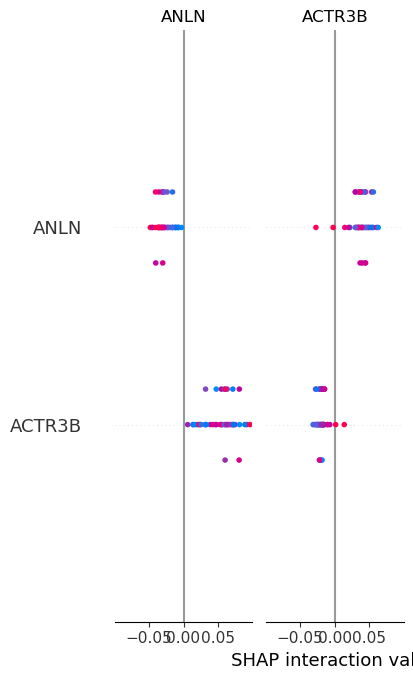

In [66]:
# Initialize the SHAP Explainer
explainer = shap.Explainer(modelo)

# Compute SHAP values
shap_values = explainer(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values.values, X_test)

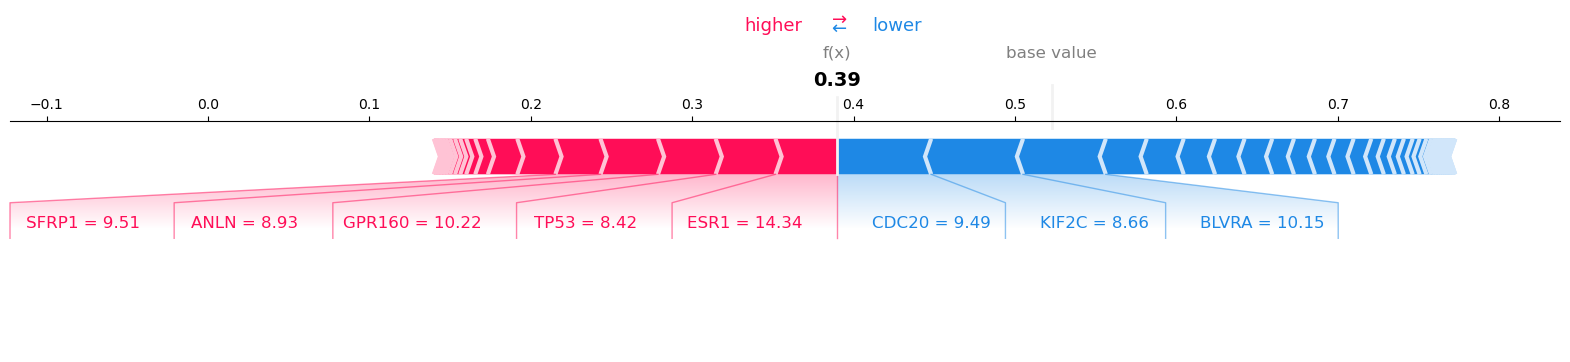

In [67]:
# Compute SHAP values for a single prediction
single_prediction = 1  # Change this to the index of the prediction you want to explain
shap_values_single = explainer.shap_values(X_test.iloc[single_prediction, :])

# Visualize the SHAP values with a force plot
shap.force_plot(explainer.expected_value[0], shap_values_single[0], X_test.iloc[single_prediction, :], matplotlib=True)

El force_plot de la biblioteca SHAP es una herramienta poderosa para interpretar la salida de los modelos de aprendizaje automático. Proporciona una representación visual de las contribuciones de las características a una predicción específica. En el force_plot, cada valor de característica es una fuerza que aumenta o disminuye la predicción. El gráfico está centrado alrededor del valor base (la predicción promedio sobre el conjunto de datos de entrenamiento). Las características que mejoran la predicción se muestran en rojo, aquellas que empeoran la predicción, en azul. El eje x muestra el valor SHAP, que es una medida del impacto de cada característica en la predicción. El eje y enumera las características. El color representa el valor de la característica (rojo alto, azul bajo). 
**El gráfico muestra cómo cada característica contribuye a la predicción del estado de los pacientes.** 

## Conclusiones

En este ejercicio hemos estudiado cómo se pueden utilizar algoritmos de IA para diagnosticar pacientes con cáncer de mama. Hemos visto cómo se pueden utilizar datos de secuenciación para entrenar un modelo de clasificación y cómo se pueden generar datos sintéticos para aumentar el número de datos de entrenamiento. Además, hemos visto cuáles son los genes que contribuyen más y menos a la clasificación de los pacientes. Este tipo de análisis es fundamental para entender cómo funcionan los modelos de IA y para poder confiar en ellos. 
